In [1]:
# 라이브러리 호출
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
# MAT 파일 불러오기
mat_path = r"../HW3_package/hw3_prob1b.mat"
mat_data = scipy.io.loadmat(mat_path)

# 변수 할당
A = mat_data['A']
b = mat_data['d']
x_orig = mat_data['x_orig']

In [3]:
def g(x):
    return (np.linalg.norm((A @ x - b), 2) ** 2)

def h(x, W):
    return lambda_v * np.linalg.norm(lambda_v * (W * x), 1)

def f(x, W):
    return g(x)/2 + h(x, W)

In [4]:
def grad_g(x):
    return A.T @ (A @ x - b)

In [5]:
# FISTA

# 1로 초기화 
w = np.ones((A.shape[1], 1))
x = np.zeros((A.shape[1], 1))
y = x

# t = 1/L 
t =  1/ np.linalg.norm(A, 2) ** 2

stopping_point = 1e-4
delta = 10
lambda_v = 2
arr_x = []

for idx in range(2):

    # w를 1로 초기화 해주어야 하기 때문에 idx가 1일 때부터 w의 값을 조정해준다. 
    if idx > 0:
        w = 1 / (np.abs(x) + delta) 
        
    for iter in range(100000):
        x_minus1 = x
        
        # step 1. consider g(x)  
        g_x = y - t * grad_g(y)
        
        # step 2. soft thresholding
        x = np.sign(g_x) * np.maximum(np.abs(g_x) - (w * lambda_v * t), 0)
        
        # break check
        # +) iter가 0일 때, norm의 값이 1이 되고, 1일 때 norm의 값이 0되기 떄문에 
        #    iter가 2인 지점부터 break를 확인해야함.
        if  (np.linalg.norm((x - x_minus1), 2) / np.linalg.norm(x, 2)) < stopping_point and iter > 1:
            break    
        
        # y_k1 = x_k1 + (k / k + 3) * (x_k1 - x_k) 
        if iter > 0:
            y = x + (iter / (iter + 3) * (x - x_minus1))
    arr_x.append(x)

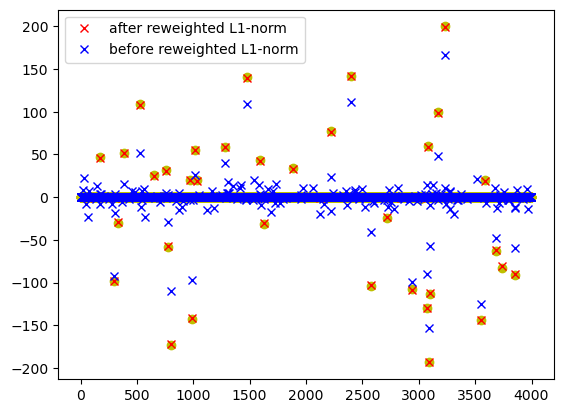

In [10]:
plt.plot(x_orig,'yo')
plt.plot(arr_x[1],"rx" , label = "after reweighted L1-norm")
plt.plot(arr_x[0],"bx", label =  "before reweighted L1-norm" )
plt.legend()
plt.show()

In [14]:
np.nonzero(arr_x[1])[0]

array([  22,   27,   48,   68,   78,  149,  163,  170,  171,  251,  280,
        300,  310,  323,  328,  389,  514,  528,  536,  542,  571,  656,
        705,  760,  777,  803,  869,  877,  900,  907,  973,  986, 1013,
       1029, 1120, 1165, 1182, 1251, 1282, 1308, 1312, 1314, 1348, 1422,
       1476, 1534, 1541, 1579, 1591, 1603, 1607, 1629, 1659, 1690, 1707,
       1727, 1765, 1881, 1970, 2064, 2126, 2162, 2220, 2222, 2238, 2244,
       2352, 2397, 2430, 2436, 2473, 2495, 2525, 2580, 2592, 2601, 2689,
       2717, 2723, 2782, 2818, 2896, 2940, 2950, 3008, 3023, 3070, 3075,
       3082, 3088, 3099, 3101, 3122, 3157, 3162, 3172, 3173, 3229, 3232,
       3237, 3276, 3279, 3281, 3310, 3313, 3428, 3516, 3551, 3589, 3606,
       3675, 3682, 3693, 3712, 3734, 3756, 3792, 3804, 3852, 3856, 3857,
       3875, 3925, 3959, 3971], dtype=int64)